Found template.


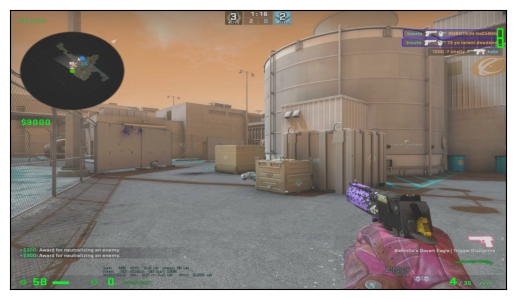

In [1]:
# Credit: https://github.com/learncodebygaming
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

template = cv.imread('assets/killfeed_template_1.jpg', cv.IMREAD_UNCHANGED)
full_img = cv.imread('assets/full_image_kill_1.jpg', cv.IMREAD_UNCHANGED)

result = cv.matchTemplate(full_img, template, cv.TM_SQDIFF_NORMED)

# Threshold inverted to work with TM_SQDIFF_NORMED
threshold = 0.11

locations = np.where(result <= threshold)

locations = list(zip(*locations[::-1]))

if locations:
    print('Found template.')

    template_w = template.shape[1]
    template_h = template.shape[0]
    line_color = (0, 255, 0)
    line_type = cv.LINE_4

    # Loop over all the locations and draw their rectangle
    for loc in locations:
        # Determine the box positions
        top_left = loc
        bottom_right = (top_left[0] + template_w, top_left[1] + template_h)
        # Draw the box
        cv.rectangle(full_img, top_left, bottom_right, line_color, line_type)

    plt.imshow(full_img)
    plt.xticks([]), plt.yticks([])
    plt.show()

else:
    print('template not found.')